In [72]:
# autoload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
!ls ~/.sam_models/

sam_vit_b_01ec64.pth  sam_vit_h_4b8939.pth  vit_t_mobile_sam.pth


In [74]:
# !pip uninstall cvlization --yes

In [75]:
!ls -lt ../../../../checkpoints/sam_instance_seg/

total 143208
-rw-r--r-- 1 zsi zsi 73322335 Nov 10 15:57 latest.pt
-rw-r--r-- 1 zsi zsi 73322335 Nov 10 15:55 best.pt


In [76]:
import sys
sys.path.append("../../../../")
import os
# from segment_anything import sam_model_registry, SamPredictor
# import torch
# from mobile_sam import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator

# def ensure_label_is_tensor(example):
#     inputs, targets = example
#     # return inputs, torch.tensor(targets["masks"])
#     combined_mask = targets["masks"][0]
#     for i, mask in enumerate(targets["masks"][1:]):
#         mask_layer = mask * (i + 1)
#         combined_mask[mask_layer > 0] = mask_layer[mask_layer > 0]

#     return inputs, torch.tensor(combined_mask).unsqueeze(0)



In [77]:
from cvlization.dataset.penn_fudan_pedestrian import PennFudanPedestrianDatasetBuilder
from cvlization.torch.training_pipeline.sam.dice_loss import DiceLoss

dice_loss = DiceLoss(channelwise=False)
builder = PennFudanPedestrianDatasetBuilder(
            flavor="torchvision", include_masks=True, label_offset=1,
            preload=True,
        )
train_ds = builder.training_dataset()
val_ds = builder.validation_dataset()
print(f"Training dataset size: {len(train_ds)}. Validation dataset size: {len(val_ds)}")

Training dataset size: 30. Validation dataset size: 20


[<Figure size 720x720 with 1 Axes>, <Figure size 720x720 with 1 Axes>]

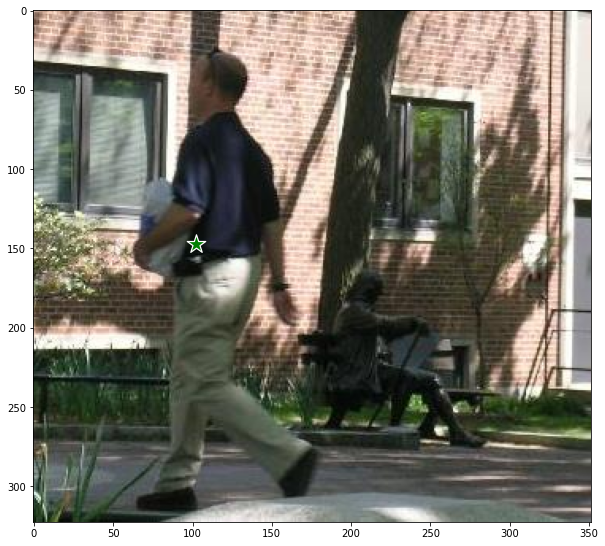

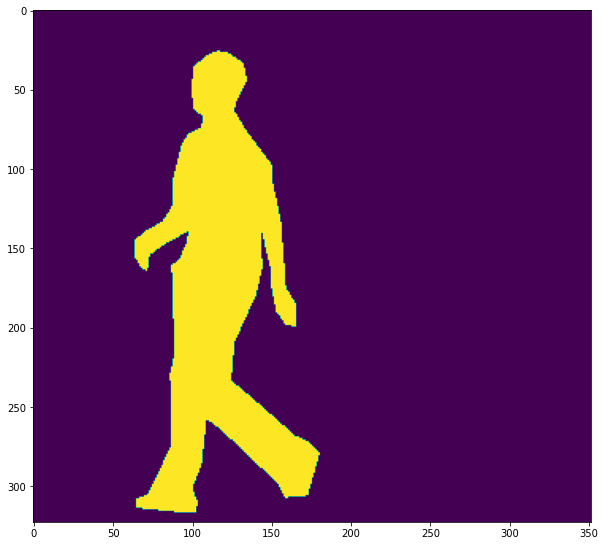

In [78]:
from cvlization.torch.training_pipeline.sam.sam_training_pipeline import SamTrainingPipeline
pipe = SamTrainingPipeline()
pipe._plot_test_example(*pipe._get_test_example_with_foreground_point(builder))

## Original SAM

[<Figure size 720x720 with 1 Axes>,
 <Figure size 720x720 with 1 Axes>,
 <Figure size 720x720 with 1 Axes>]

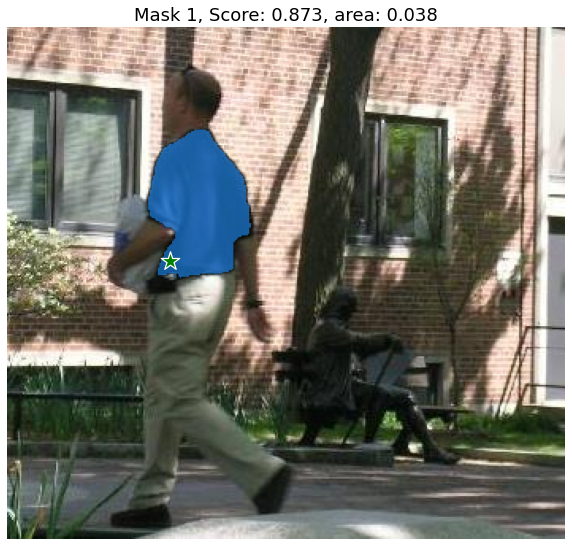

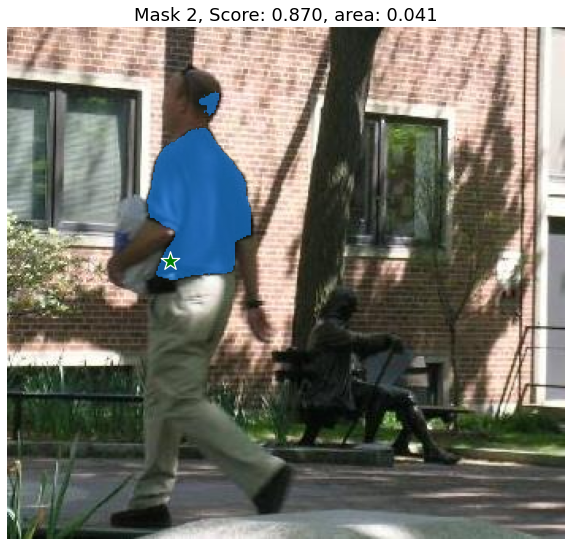

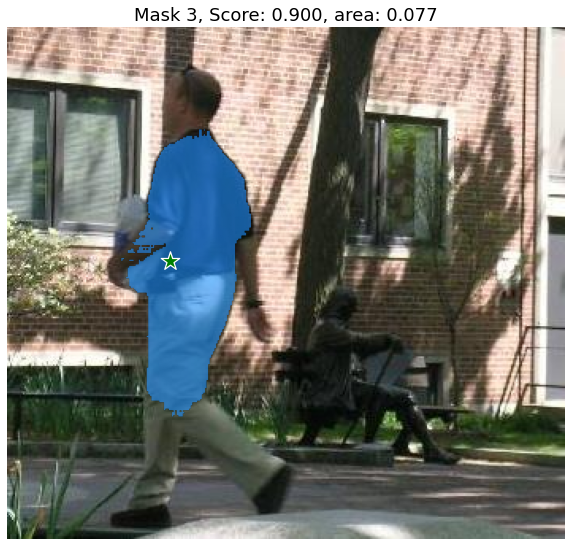

In [79]:
original_predictor, original_mask_gen = pipe._get_original_sam_predictors()
pipe._plot_predicted_foregound_masks(builder, predictor=original_predictor, use_foreground_point_prompt=True)

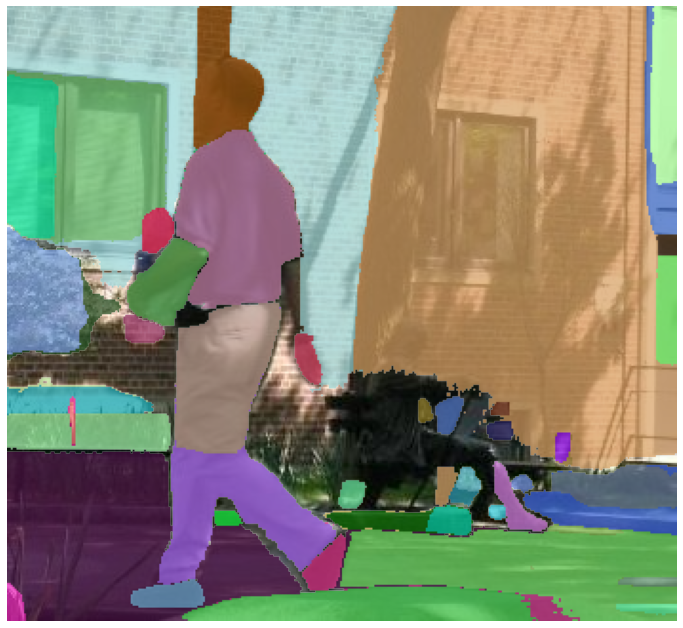

In [80]:

_ = pipe._plot_predicted_anything_masks(
    builder,
    mask_gen=original_mask_gen,
    use_foreground_point_prompt=True,
    alpha=0.7
)


## Fine-tuned SAM

[<Figure size 720x720 with 1 Axes>,
 <Figure size 720x720 with 1 Axes>,
 <Figure size 720x720 with 1 Axes>]

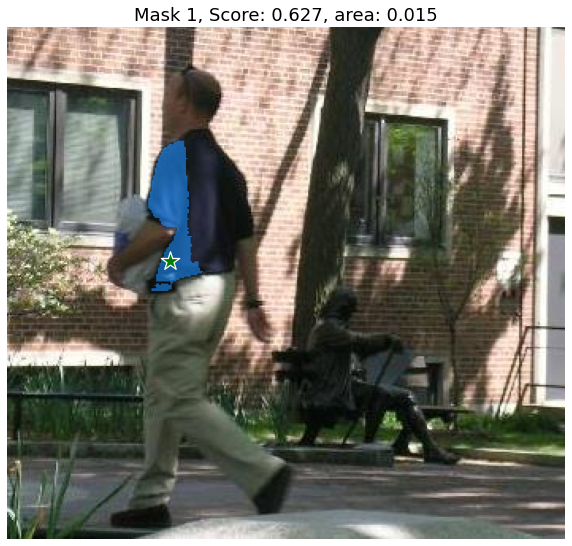

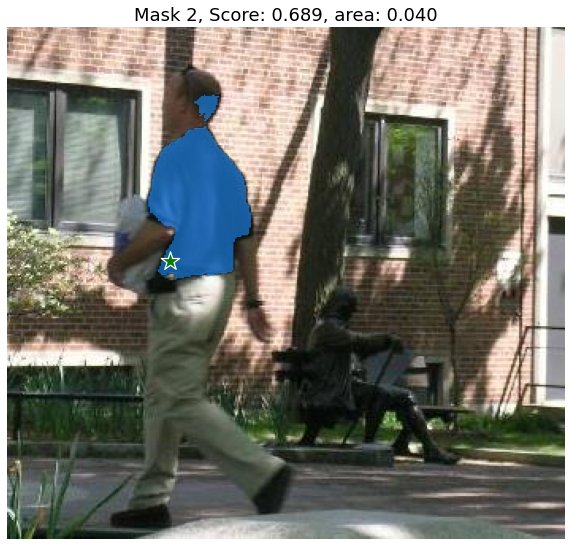

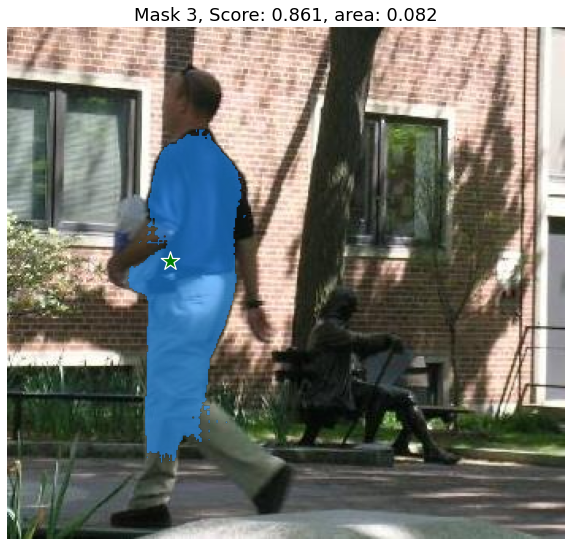

In [82]:
predictor, mask_gen = pipe._get_finetuned_sam_predictors()
pipe._plot_predicted_foregound_masks(builder, predictor=predictor, use_foreground_point_prompt=True)

[<Figure size 864x864 with 1 Axes>]

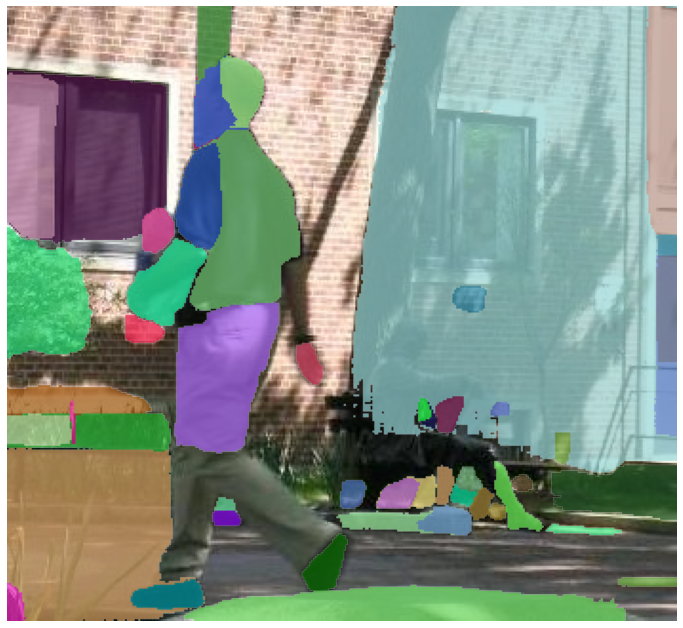

In [83]:
pipe._plot_predicted_anything_masks(
    builder,
    mask_gen=mask_gen,
    use_foreground_point_prompt=True,
    alpha=0.7
)

In [ ]:
# load pickled batch_input
# import pickle
# with open("../../../../logs/images/batched_inputs_iter_10_0.pkl", "rb") as f:
#     batch_input = pickle.load(f)
#     for k, v in batch_input[0].items():
#         if hasattr(v, "numpy"):
#             print(k, ": pixel mean:", v.numpy().mean(), "pixel max:", v.numpy().max())
#         else:
#             print(k, v)